# House Rent Prediction of Metro Cities

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
import numpy as np

In [51]:
df = pd.read_csv("preprocessed_data.csv")
df

,Unnamed: 0,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Rent
0,0,2,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,10000
1,1,2,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,20000
2,2,2,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000
3,3,2,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,10000
4,4,2,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,7500
...,...,...,...,...,...,...,...,...,...,...
4741,4741,2,1000,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,15000
4742,4742,3,2000,1,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,29000
4743,4743,3,1750,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,35000
4744,4744,3,1500,23,Carpet Area,Hyderabad,Semi-Furnished,Family,2,45000


In [52]:
df = df.drop(['Unnamed: 0'],axis= 1)
df

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Rent
0,2,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,10000
1,2,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,20000
2,2,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000
3,2,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,10000
4,2,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,7500
...,...,...,...,...,...,...,...,...,...
4741,2,1000,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,15000
4742,3,2000,1,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,29000
4743,3,1750,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,35000
4744,3,1500,23,Carpet Area,Hyderabad,Semi-Furnished,Family,2,45000


In [53]:
df.City.value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [54]:
city_names = df.City.value_counts().index
city_names

Index(['Mumbai', 'Chennai', 'Bangalore', 'Hyderabad', 'Delhi', 'Kolkata'], dtype='object', name='City')

In [55]:
city_value = df.City.value_counts().values
city_value

array([972, 891, 886, 868, 605, 524], dtype=int64)

([<matplotlib.patches.Wedge at 0x2bc317865d0>,
 [Text(0.8800595392115705, 0.6599206069238316, 'Mumbai'),
  Text(-0.3311814800434737, 1.0489608320982315, 'Chennai'),
  Text(-1.0956755452746327, 0.09744280110473333, 'Bangalore'),
  Text(-0.5258661501027031, -0.9661598170986835, 'Hyderabad'),
  Text(0.5046375198002071, -0.9774154559908984, 'Delhi'),
  Text(1.0344895260705187, -0.373940396922282, 'Kolkata')],
 [Text(0.4800324759335839, 0.3599566946857263, '20.48%'),
  Text(-0.18064444366007656, 0.5721604538717626, '18.77%'),
  Text(-0.5976412065134359, 0.05315061878439999, '18.67%'),
  Text(-0.2868360818742016, -0.5269962638720092, '18.29%'),
  Text(0.2752568289819311, -0.5331357032677627, '12.75%'),
  Text(0.5642670142202828, -0.2039674892303356, '11.04%')])

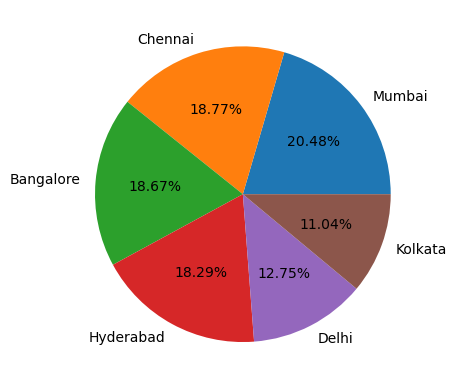

In [56]:
plt.pie(city_value,labels=city_names,autopct='%1.2f%%')

In [57]:
## Observations: The flats are more available in Mumbai, then Chennai, then Banglore, then Hyderabad, then Delhi and kolkatta

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Size               4746 non-null   int64 
 2   Floor              4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   Rent               4746 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 333.8+ KB


In [59]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,BHK,Size,Floor,Bathroom,Rent
0,2,1100,0,2,10000
1,2,800,1,1,20000
2,2,1000,1,1,17000
3,2,800,1,1,10000
4,2,850,1,1,7500


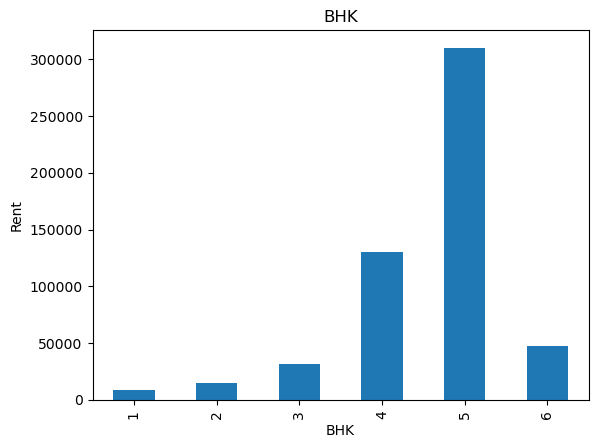

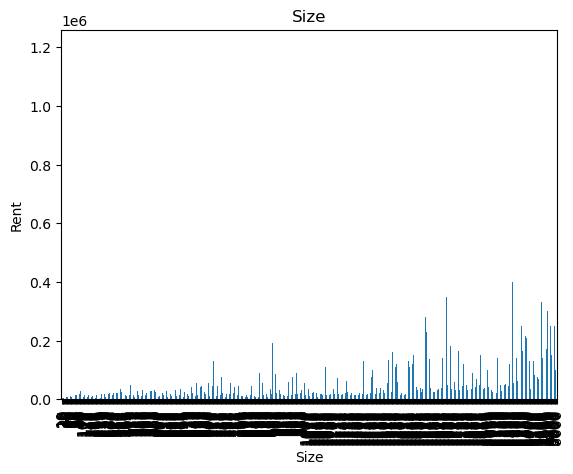

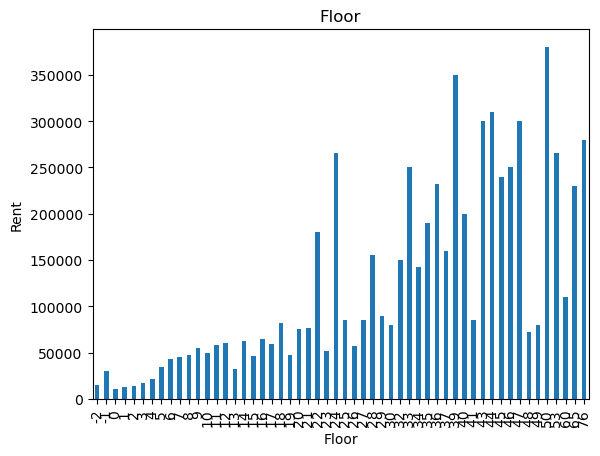

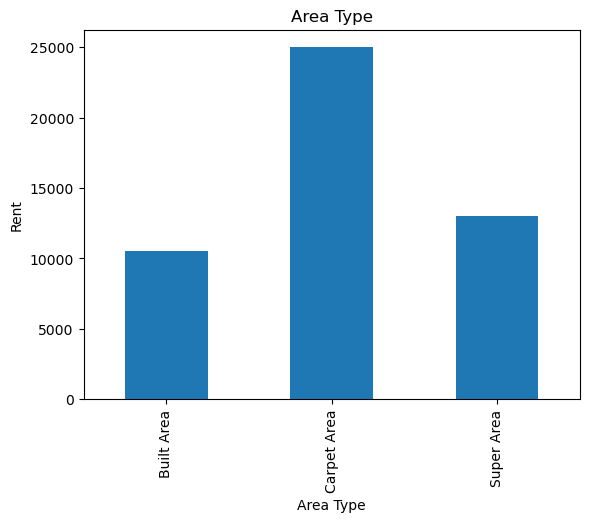

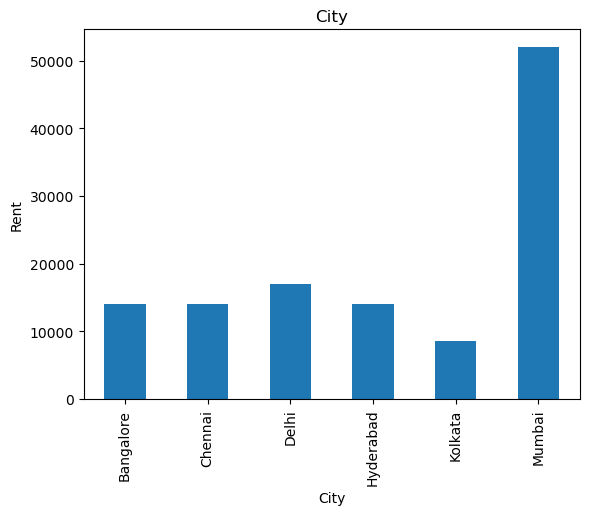

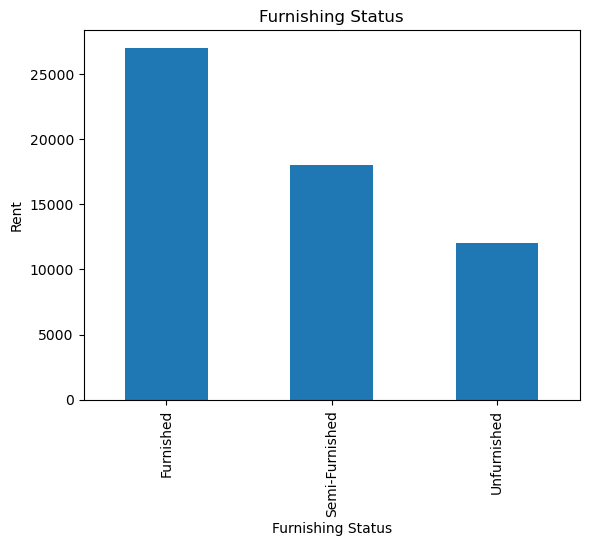

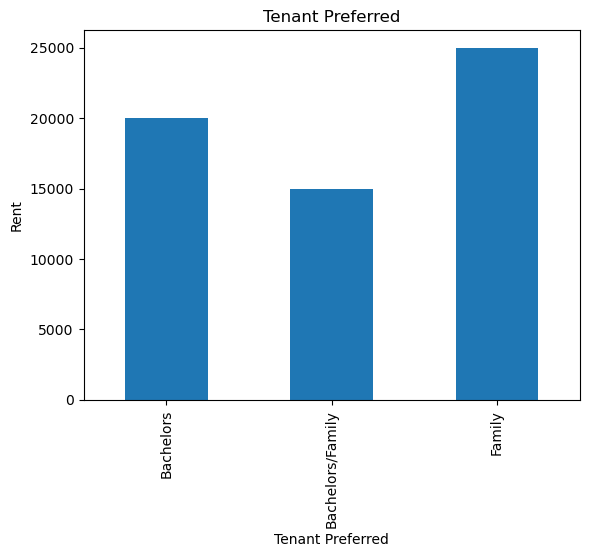

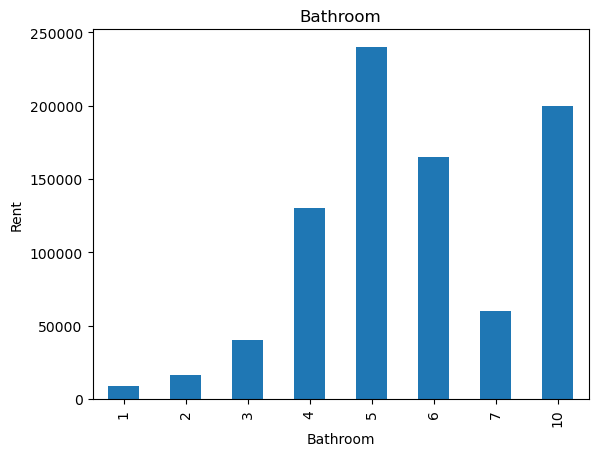

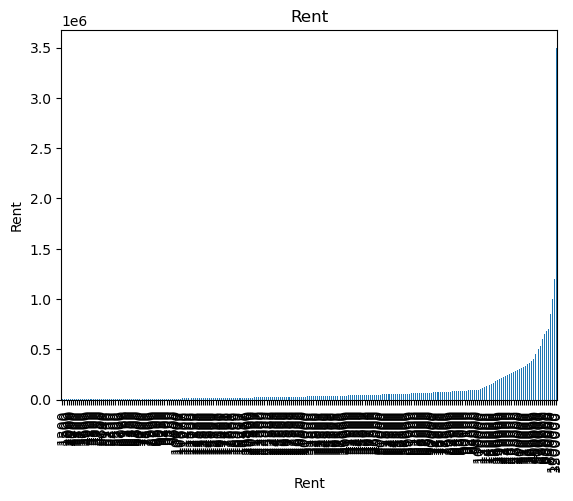

In [60]:
## Lets Find the realtionship between them and Rent

for feature in df.columns:
    data=df.copy()
    data.groupby(feature)['Rent'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Rent')
    plt.title(feature)
    plt.show()

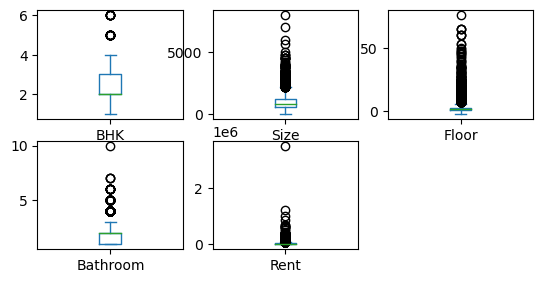

In [61]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

In [21]:
import dtale
dtale.show(df).open_browser()

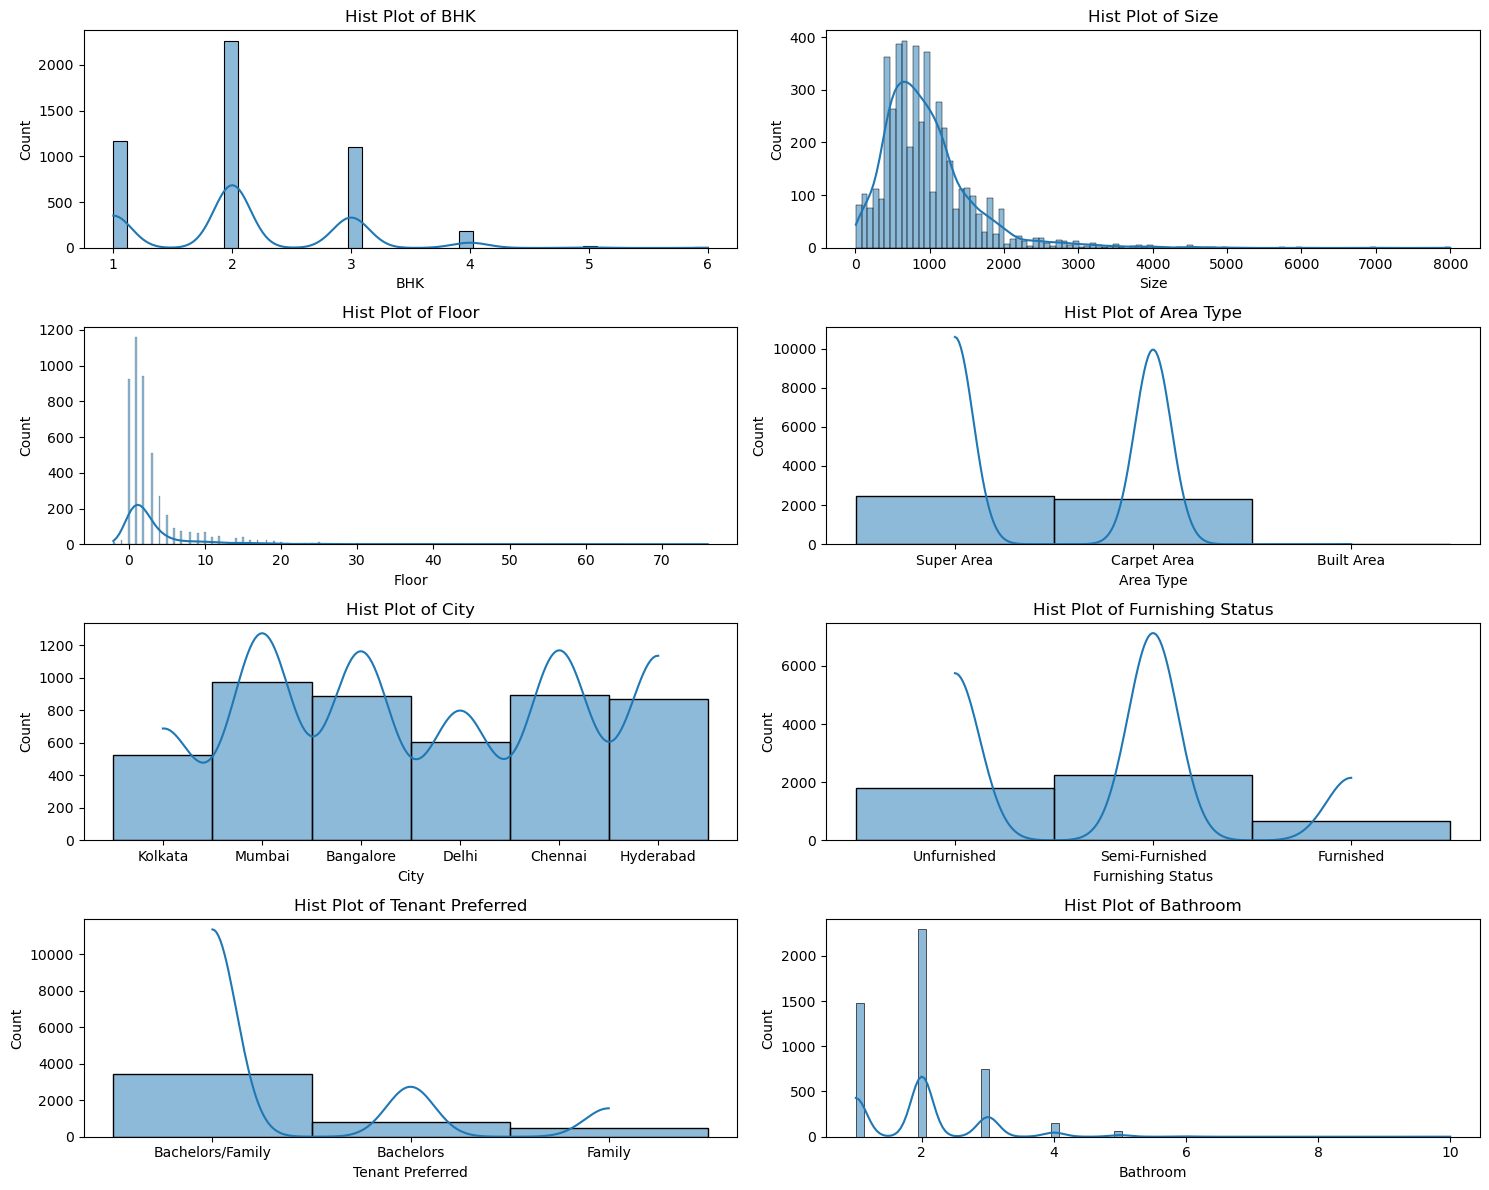

In [62]:
def draw_hist(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 2, figsize = (15, 12))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 2
        col_index = i % 2
        sns.histplot(x=column, data=df, ax=axs[row_index, col_index], alpha=0.5, kde=True)
        axs[row_index, col_index].set_title(f'Hist Plot of {column}')
    plt.tight_layout()
    plt.show()
draw_hist(df)

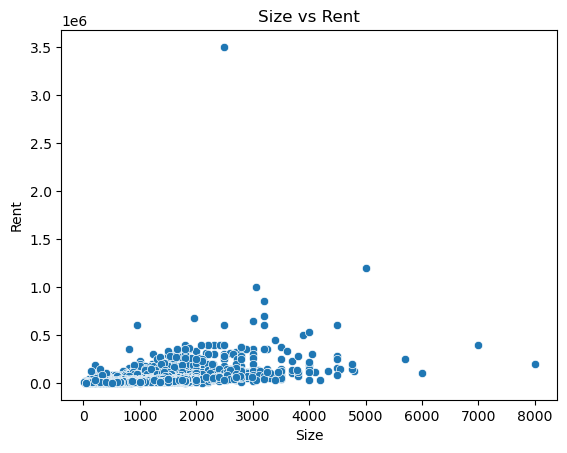

In [65]:
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title('Size vs Rent')
plt.show()


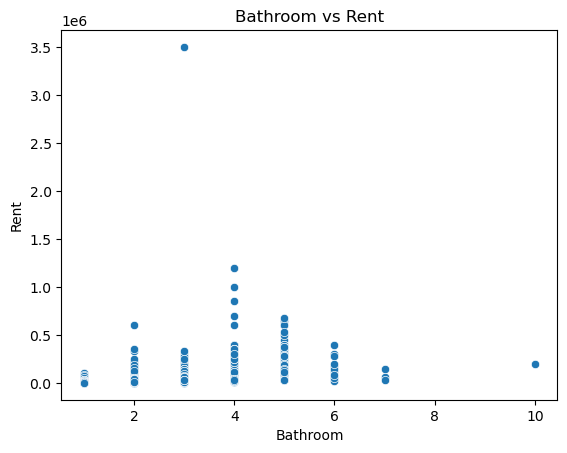

In [66]:
sns.scatterplot(x='Bathroom', y='Rent', data=df)
plt.title('Bathroom vs Rent')
plt.show()

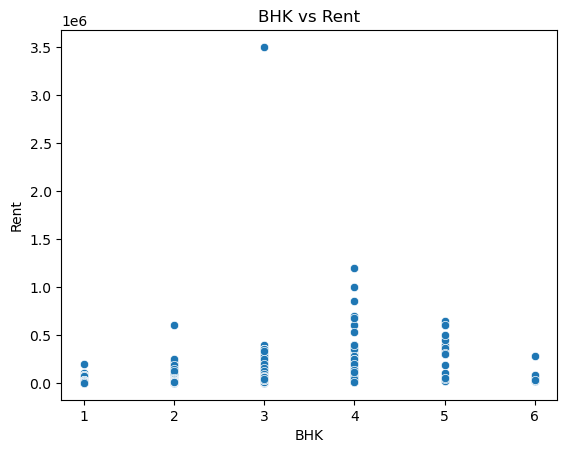

In [67]:
sns.scatterplot(x='BHK', y='Rent', data=df)
plt.title('BHK vs Rent')
plt.show()

In [23]:
df.columns

Index(['BHK', 'Size', 'Floor', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Rent'],
      dtype='object')

In [24]:
floor_numbers = df.Floor.value_counts().index
floor_numbers

Index([ 1,  2,  0,  3,  4,  5,  6,  7, 10,  8,  9, 12, 11, 15, 14, 18, -1, 17,
       16, 19, 13, 20, 25, -2, 23, 24, 21, 30, 34, 28, 35, 65, 22, 26, 32, 60,
       27, 40, 53, 45, 36, 48, 29, 49, 50, 39, 46, 41, 44, 33, 37, 47, 43, 76],
      dtype='int64', name='Floor')

In [25]:
df.shape

(4746, 9)

In [26]:
df.dtypes

BHK                   int64
Size                  int64
Floor                 int64
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Rent                  int64
dtype: object

In [27]:
## How many flats in each floor is furnished or unfurnished???

In [28]:
df.groupby(['Furnishing Status','Floor']).size().reset_index()

,Furnishing Status,Floor,0
0,Furnished,-2,1
1,Furnished,-1,3
2,Furnished,0,93
3,Furnished,1,138
4,Furnished,2,115
...,...,...,...
114,Unfurnished,36,1
115,Unfurnished,45,1
116,Unfurnished,48,1
117,Unfurnished,53,1


In [29]:
fur = df['Furnishing Status'].unique()
fur

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [30]:
df.groupby('Furnishing Status').size()

Furnishing Status
Furnished          680
Semi-Furnished    2251
Unfurnished       1815
dtype: int64

Observation:
There are Furnished          680
Semi-Furnished               2251
Unfurnished                  1815
More flats are semi furnished or unfurnished only 680 flats are furnished

Outliers

In [31]:
outlier_df = ['BHK', 'Size', 'Floor', 'Bathroom']
def find_outliers(column):
    q1 = np.percentile(column,25)
    q3 = np.percentile(column,75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return column[(column<lower_fence)|(column> upper_fence)]

In [32]:
outliers_count = {}

for column in outlier_df:
    outliers_count[column] = find_outliers(df[column])
for column, values in outliers_count.items():
    if not values.empty:
        print(f"Outliers in {column} : ")
        print(values)

Outliers in BHK : 
83      6
460     5
521     5
543     5
666     5
792     5
839     5
848     5
1023    5
1037    5
1287    5
1319    5
1384    5
1393    5
2656    5
3320    6
3472    5
3584    6
3622    5
3953    5
3989    5
4350    6
4409    5
4479    6
4518    6
4648    6
4696    6
Name: BHK, dtype: int64
Outliers in Size : 
181     2200
275     4000
381     3500
516     2210
543     2308
        ... 
4696    4200
4698    2300
4712    2405
4713    2500
4716    3250
Name: Size, Length: 203, dtype: int64
Outliers in Floor : 
62       7
105      8
483     11
488     11
526      7
        ..
4669     9
4688     8
4712    10
4716    12
4744    23
Name: Floor, Length: 638, dtype: int64
Outliers in Bathroom : 
531     5
533     4
542     4
543     5
556     5
       ..
4648    6
4669    5
4696    5
4716    5
4727    4
Name: Bathroom, Length: 232, dtype: int64


In [101]:
# Tried Logarithamic Transform but not so effective
# for column in outlier_df:
#     df[f"log_{column}"] = np.log(df[column])

In [33]:
outlier_df = ['BHK', 'Size', 'Floor', 'Bathroom']
for column in outlier_df:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    df[column] = np.where(df[column]>upper_fence,upper_fence,df[column])
    df[column] = np.where(df[column]<lower_fence,lower_fence,df[column])

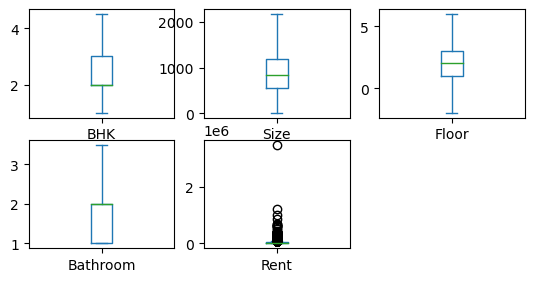

In [34]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

In [35]:
df.columns

Index(['BHK', 'Size', 'Floor', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Rent'],
      dtype='object')

In [36]:
cols = (['Area Type', 'City','Furnishing Status', 'Tenant Preferred'])

In [37]:
label_encoder = LabelEncoder() 
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [38]:
df

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Rent
0,2.0,1100.0,0.0,2,4,2,1,2.0,10000
1,2.0,800.0,1.0,2,4,1,1,1.0,20000
2,2.0,1000.0,1.0,2,4,1,1,1.0,17000
3,2.0,800.0,1.0,2,4,2,1,1.0,10000
4,2.0,850.0,1.0,1,4,2,0,1.0,7500
...,...,...,...,...,...,...,...,...,...
4741,2.0,1000.0,3.0,1,3,1,1,2.0,15000
4742,3.0,2000.0,1.0,2,3,1,1,3.0,29000
4743,3.0,1750.0,3.0,1,3,1,1,3.0,35000
4744,3.0,1500.0,6.0,1,3,1,2,2.0,45000


In [39]:
df.corr()

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Rent
BHK,1.000000,0.748203,0.196913,-0.157005,0.045436,-0.141298,0.041551,0.799976,0.367301
Size,0.748203,1.000000,0.163572,-0.074331,-0.054847,-0.190352,0.037192,0.732403,0.358091
Floor,0.196913,0.163572,1.000000,-0.286966,0.375430,-0.163931,0.068614,0.320249,0.286207
Area Type,-0.157005,-0.074331,-0.286966,1.000000,-0.282856,0.056276,0.155388,-0.182722,-0.214867
City,0.045436,-0.054847,0.375430,-0.282856,1.000000,0.002633,0.041769,0.095530,0.210525
Furnishing Status,-0.141298,-0.190352,-0.163931,0.056276,0.002633,1.000000,-0.092878,-0.190204,-0.146251
Tenant Preferred,0.041551,0.037192,0.068614,0.155388,0.041769,-0.092878,1.000000,0.061037,0.006027
Bathroom,0.799976,0.732403,0.320249,-0.182722,0.095530,-0.190204,0.061037,1.000000,0.388367
Rent,0.367301,0.358091,0.286207,-0.214867,0.210525,-0.146251,0.006027,0.388367,1.000000


<Axes: >

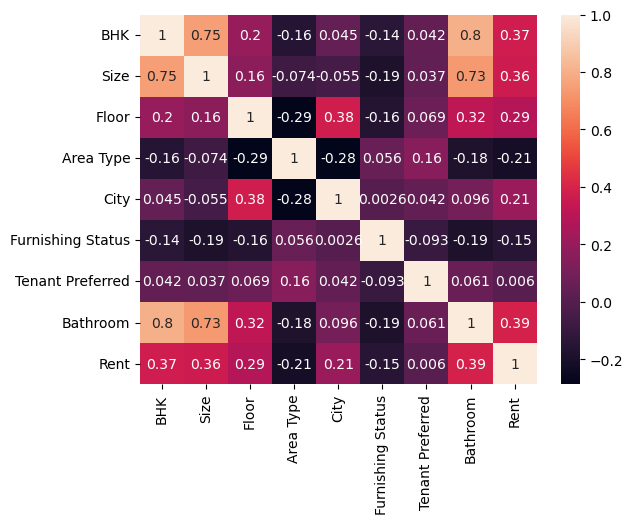

In [40]:
sns.heatmap(df.corr(),annot=True)

# Feature Scaling

Standard Scaler

In [110]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[outlier_df] = scaler.fit_transform(df[outlier_df])
# df

In [49]:
feature_scale=[feature for feature in df.columns if feature not in ['df[cols]',''Rent']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

SyntaxError: unterminated string literal (detected at line 1) (3491234948.py, line 1)

2024-05-13 14:50:37,153 - INFO     - Executing shutdown due to inactivity...
2024-05-13 14:50:54,157 - INFO     - Executing shutdown...
2024-05-13 14:50:54,179 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [43]:
df

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Rent
0,2.0,1100.0,0.0,2,4,2,1,2.0,10000
1,2.0,800.0,1.0,2,4,1,1,1.0,20000
2,2.0,1000.0,1.0,2,4,1,1,1.0,17000
3,2.0,800.0,1.0,2,4,2,1,1.0,10000
4,2.0,850.0,1.0,1,4,2,0,1.0,7500
...,...,...,...,...,...,...,...,...,...
4741,2.0,1000.0,3.0,1,3,1,1,2.0,15000
4742,3.0,2000.0,1.0,2,3,1,1,3.0,29000
4743,3.0,1750.0,3.0,1,3,1,1,3.0,35000
4744,3.0,1500.0,6.0,1,3,1,2,2.0,45000


In [44]:
scaler.transform(df[feature_scale])

array([[0.28571429, 0.5034642 , 0.25      , ..., 1.        , 0.5       ,
        0.4       ],
       [0.28571429, 0.36489607, 0.375     , ..., 0.5       , 0.5       ,
        0.        ],
       [0.28571429, 0.45727483, 0.375     , ..., 0.5       , 0.5       ,
        0.        ],
       ...,
       [0.57142857, 0.80369515, 0.625     , ..., 0.5       , 0.5       ,
        0.8       ],
       [0.57142857, 0.68822171, 1.        , ..., 0.5       , 1.        ,
        0.4       ],
       [0.28571429, 0.45727483, 0.75      , ..., 1.        , 0.        ,
        0.4       ]])

In [45]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Rent']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [46]:
data.head()

,Rent,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,10000,0.285714,0.503464,0.250,1.0,0.8,1.0,0.5,0.4
1,20000,0.285714,0.364896,0.375,1.0,0.8,0.5,0.5,0.0
2,17000,0.285714,0.457275,0.375,1.0,0.8,0.5,0.5,0.0
3,10000,0.285714,0.364896,0.375,1.0,0.8,1.0,0.5,0.0
4,7500,0.285714,0.387991,0.375,0.5,0.8,1.0,0.0,0.0


In [48]:
data.to_csv('EDA & Feature Engg.csv',index=False)